In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

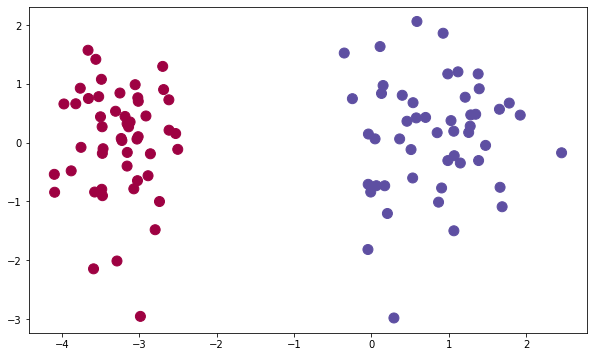

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='Spectral',s=100)

## Using Sklearn LogisticsRegression

In [4]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

C:\Users\dulesh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [5]:
print("Using Sklearn LogisticsRegression the coefficients are :", lor.coef_)
print("Using Sklearn LogisticsRegression the intercept is     :", lor.intercept_)

Using Sklearn LogisticsRegression the coefficients are : [[4.79836191 0.21370885]]
Using Sklearn LogisticsRegression the intercept is     : [5.76721259]


In [6]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
print(m1)
print(b1)

-22.45279914444674
[-26.98630664]


In [7]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

## Using Gradient Descent

In [8]:
def LR_grad(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
coef_,intercept_ = LR_grad(X,y)

In [11]:
print("Using Sklearn Gradient Descent the coefficients are :", coef_)
print("Using Sklearn Gradient Descent the intercept is     :", intercept_)

Using Sklearn Gradient Descent the coefficients are : [4.83926872 0.21182255]
Using Sklearn Gradient Descent the intercept is     : 5.833388649053249


In [12]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
print(m)
print(b)

-22.84586207917221
-27.53903541191917


In [13]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

## Visualizing the Decision Boundary

(-3.0, 2.0)

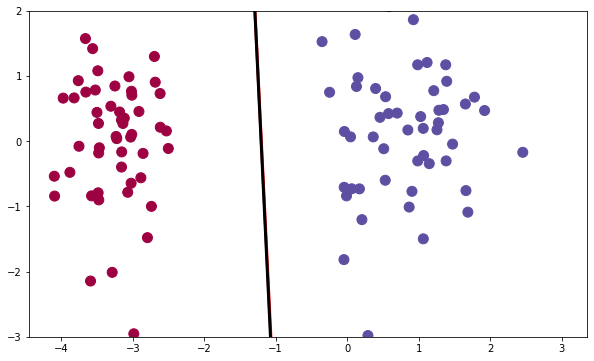

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='Spectral',s=100)
plt.ylim(-3,2)

### Here, the coeffients and intercepts calculated using the class defined by our own and the sklearn Logistics Regression class are same.
### Therefore, we have developed our own Logistics Regression model using Gradient Descent.